In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [45]:
#  CSV file Path
url = 'https://raw.githubusercontent.com/redbackoperations/Projects/main/Sports%20Performance%20Analysis/frontend/Cycling%20Analysis/data/extended_activities_with_ftp.csv'
# Read the CSV file 
df = pd.read_csv(url)



In [42]:
# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset including data types and missing values
print(df.info())

# Get summary statistics for numerical columns
print(df.describe())


         Activity Date  Elapsed Time  Distance  Max Heart Rate  \
0  2019-12-13 01:46:07          3859     22.97           139.0   
1  2019-12-20 23:05:01          4852     29.65           133.0   
2  2019-12-21 23:25:29          5817     32.38           139.0   
3  2019-12-24 01:19:17          3851     21.68           140.0   
4  2019-12-26 00:09:08          5843     32.36           131.0   

   Relative Effort  Athlete Weight  Bike Weight  Moving Time  Max Speed  \
0             11.0            84.0          NaN       3811.0       10.2   
1             12.0            84.0          NaN       4693.0       14.1   
2             19.0            84.0          NaN       5601.0       12.0   
3             11.0            84.0          NaN       3816.0       11.4   
4             14.0            80.0          NaN       5740.0       10.9   

   Average Speed  ...  60 Day Maximum Power 30s  60 Day Maximum Power 1.0min  \
0          5.989  ...                     342.1                        2

# Handle missing values and outliers, and preprocess data:


In [46]:
# Handle missing values 
df.fillna(df.mean(), inplace=True)  # fill missing values with column mean






In [47]:
# Define lower and upper thresholds for outlier removal
lower_distance_threshold = 0  # Example: Lower threshold for distance
upper_distance_threshold = 100  # Example: Upper threshold for distance

lower_max_heart_rate_threshold = 0  
upper_max_heart_rate_threshold = 200  

lower_athlete_weight_threshold = 0  
upper_athlete_weight_threshold = 200  

lower_max_speed_threshold = 0  
upper_max_speed_threshold = 50  

lower_elevation_gain_threshold = 0  
upper_elevation_gain_threshold = 1000  

lower_elevation_loss_threshold = 0  
upper_elevation_loss_threshold = 1000  

# Remove rows with extreme values in each column
df = df[(df['Distance'] >= lower_distance_threshold) & (df['Distance'] <= upper_distance_threshold)]
df = df[(df['Max Heart Rate'] >= lower_max_heart_rate_threshold) & (df['Max Heart Rate'] <= upper_max_heart_rate_threshold)]
df = df[(df['Athlete Weight'] >= lower_athlete_weight_threshold) & (df['Athlete Weight'] <= upper_athlete_weight_threshold)]
df = df[(df['Max Speed'] >= lower_max_speed_threshold) & (df['Max Speed'] <= upper_max_speed_threshold)]
df = df[(df['Elevation Gain'] >= lower_elevation_gain_threshold) & (df['Elevation Gain'] <= upper_elevation_gain_threshold)]
df = df[(df['Elevation Loss'] >= lower_elevation_loss_threshold) & (df['Elevation Loss'] <= upper_elevation_loss_threshold)]


   #   Feature Selection
   #   Identifying relevant features that are likely to influence running performance:


In [48]:
# Select relevant features 
relevant_features = ['Distance', 'Max Heart Rate', 'Elevation Gain', 'Average Speed', 'Average Heart Rate', 
                     'Average Watts', 'Calories', 'Average Temperature', 'Average Cadence', 'Max Cadence', ]

# Create a new DataFrame with selected features
df_selected = df[relevant_features]


# Preparing the Data

Choosing Features: We selected all columns in the dataset except for 'Calories' because we aim to use these as inputs to predict 'Calories'. These inputs are our features.

Setting the Target: The 'Calories' column is our target variable, representing what we're trying to predict.

Splitting the Data: We divided the data into two parts—70% for training the model and 30% for testing it. This ensures that we learn from a large portion of the data and test how well we've learned on a smaller portion. We used a setting called random_state to ensure the data splits consistently, making our experiments repeatable.

# Training the Model

Starting the Model: We employed Linear Regression, a method that helps us draw a line that best fits our data points.

Learning from Data: The model learned by examining the training data (70% of our data) and determining how to draw a line that minimizes the error between the predicted and actual calorie values.

Making Predictions

Using the Model: After the model learned from the training data, we tested it using the remaining 30% of the data (the test set).

# Evaluating the Model

Checking Errors (Mean Squared Error): This metric tells us how much the model's predictions deviate from the actual calorie values.

How Well the Model Fits (R-squared Score): This score quantifies how well our model's predictions align with the actual data. Ranging from 0 to 1, a score of 1 implies perfect predictions. Our R-squared score of 0.79 indicates that our model explains 79% of the variability in 'Calories' based on the features.

# Conclusion

Our linear regression model performed well in predicting calorie expenditure, achieving an R-squared score of 0.79. This score demonstrates that the model reliably predicts calorie consumption based on the selected features. In conclusion, our predictive model provides valuable insights into calorie expenditure, aiding in the development of effective training and nutritional strategies to enhance running performance.

In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For initializing and training a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance using MSE and R^2 score

# Split the data into features (X) and target variable (y)
X_features_calories = df_selected.drop('Calories', axis=1)  # Features (excluding 'Calories' which is the target variable)
y_target_calories = df_selected['Calories']  # Target variable

# Split the data into training and testing sets (80% train, 30% test)
X_train_calories, X_test_calories, y_train_calories, y_test_calories = train_test_split(X_features_calories, y_target_calories, test_size=0.3, random_state=30)

# Initialize the linear regression model
linear_model_calories = LinearRegression()  # Create an instance of LinearRegression model

# Train the model on the training data
linear_model_calories.fit(X_train_calories, y_train_calories)  # Fit the model to the training data

# Make predictions on the testing data
y_pred_calories = linear_model_calories.predict(X_test_calories)  # Use the trained model to make predictions on the test data

# Evaluate the model's performance
mean_squared_error_value_calories = mean_squared_error(y_test_calories, y_pred_calories)  # Calculate Mean Squared Error
r_squared_score_calories = r2_score(y_test_calories, y_pred_calories)  # Calculate R-squared score

print("Mean Squared Error (Calories):", mean_squared_error_value_calories)  # Print Mean Squared Error
print("R-squared Score (Calories):", r_squared_score_calories)  # Print R-squared Score


Mean Squared Error (Calories): 48889.85254596088
R-squared Score (Calories): 0.7950309982021081


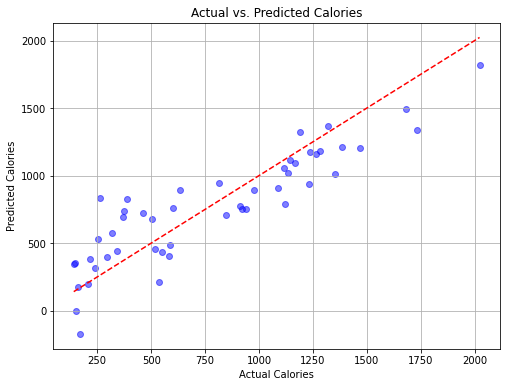

In [42]:
# Visualize actual vs. predicted 'Calories'
plt.figure(figsize=(8, 6))
plt.scatter(y_test_calories, y_pred_calories, color='blue', alpha=0.5)
plt.plot([y_test_calories.min(), y_test_calories.max()], [y_test_calories.min(), y_test_calories.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.grid(True)
plt.show()


# Predictive Model for Average Watts Prediction

# Preparing the Data

Choosing Features: We utilized all columns in the dataset except for 'Average Watts' as inputs to predict 'Average Watts'. These inputs constitute our features.

Setting the Target: 'Average Watts' is the target variable we seek to predict.

Splitting the Data: We divided the data into two parts—70% for training the model and 30% for testing it. This partitioning allows us to learn from a significant portion of the data and evaluate our model's performance on a separate dataset. We ensured consistent data splits using the random_state parameter for reproducibility.

# Training the Model

Starting the Model: We employed Linear Regression, a technique that constructs a linear relationship between the input features and the target variable.

Learning from Data: The model learned from the training data (70% of the dataset), adjusting its parameters to minimize the difference between the predicted and actual values of 'Average Watts'.

# Making Predictions

Using the Model: After training on the training data, we tested the model's performance on the remaining 30% of the data (the test set). We employed the trained model to predict 'Average Watts' based on the features in the test dataset.

# Evaluating the Model

Checking Errors (Mean Squared Error): This metric quantifies the average squared difference between the predicted and actual 'Average Watts' values. 

How Well the Model Fits (R-squared Score): The R-squared score assesses the proportion of variance in the target variable explained by the model. With a score closer to 1, our model provides a better fit to the data.



In [64]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For initializing and training a linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance using MSE and R^2 score

# Split the data into features (X) and target variable (y)
X_features = df_selected.drop('Average Watts', axis=1)  
y_target = df_selected['Average Watts']  # Target variable

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.4, random_state=28)

# Initialize the linear regression model
linear_model = LinearRegression()  # Create an instance of LinearRegression model

# Train the model on the training data
linear_model.fit(X_train, y_train)  # Fit the model to the training data

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)  # Use the trained model to make predictions on the test data

# Evaluate the model's performance
mean_squared_error_value = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r_squared_score = r2_score(y_test, y_pred)  # Calculate R-squared score

# Print evaluation metrics
print("Mean Squared Error (Average Watts):", mean_squared_error_value)  # Print Mean Squared Error
print("R-squared Score (Average Watts):", r_squared_score)  # Print R-squared Score


Mean Squared Error (Average Watts): 134.77551590558082
R-squared Score (Average Watts): 0.8081938040153827


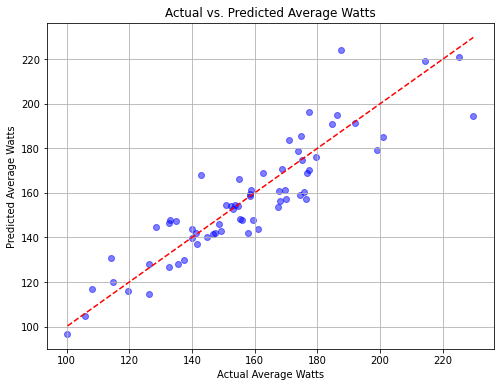

In [65]:
# Visualize actual vs. predicted 'Average Watts'
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Average Watts')
plt.xlabel('Actual Average Watts')
plt.ylabel('Predicted Average Watts')
plt.grid(True)
plt.show()
